# ANN using Churn-Modeling Dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf


In [3]:
df = pd.read_csv('../Churn_Modeling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
# Checking for missing values.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

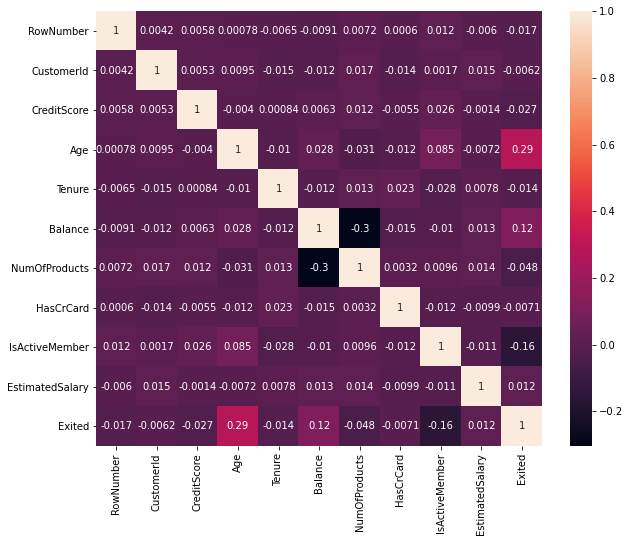

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

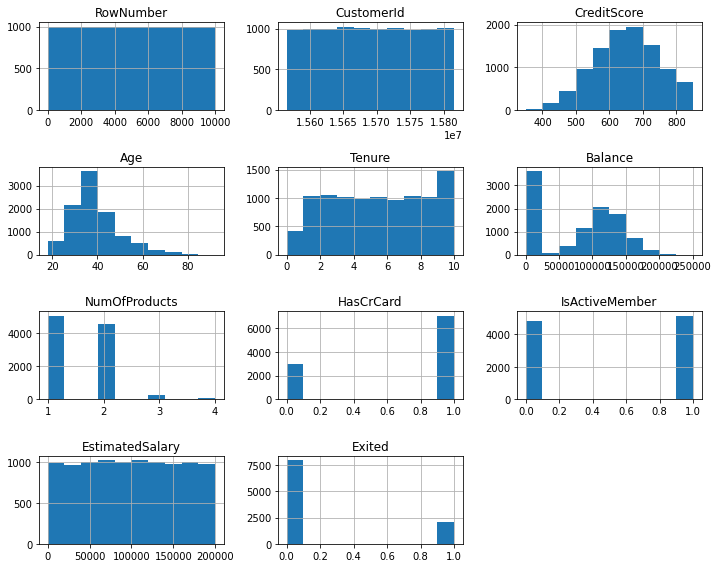

In [21]:
df.hist(figsize=(10,8))
plt.tight_layout() #It prevents overlapping of the figure

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exited', ylabel='count'>

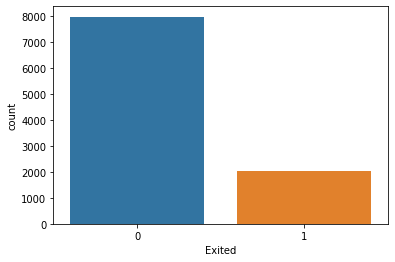

In [23]:
sns.countplot(df['Exited'])

In [24]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [27]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [29]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [30]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

# Data Preprocessing

In [35]:
Geography = pd.get_dummies(df['Geography'],drop_first=True)
Gender = pd.get_dummies(df['Gender'],drop_first=True)

In [40]:
type(Geography),type(Gender) # both are of type data frame 

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [41]:
# Now lets drop the unwanted columns and concatenate the derived columns

df = df.drop(['Geography','Gender','RowNumber','CustomerId','Surname'],axis=1)
df = pd.concat([df,Geography,Gender],axis=1)
df.head() # checking our new dataframe


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [45]:
# Dividing first into independent and dependent features.
X = df.drop('Exited',axis=1)  # Independent variable
y = df['Exited'] # Dependent variable


In [48]:
X.shape,y.shape

((10000, 11), (10000,))

In [67]:
X = std_scaler.fit_transform(X)

In [53]:
# splitting into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape,X_test.shape

((7500, 11), (2500, 11))

In [55]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)


In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6,activation='relu',kernel_initializer='he_uniform',input_dim=11),
    tf.keras.layers.Dense(units=6,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
hist = model.fit(X,y,batch_size =10,epochs=100,validation_split=0.33)

Train on 6699 samples, validate on 3301 samples
Epoch 1/100
6699/6699 [==============================] - 8s 1ms/sample - loss: 0.4614 - accuracy: 0.7938 - val_loss: 0.4568 - val_accuracy: 0.7916
Epoch 2/100
6699/6699 [==============================] - 6s 905us/sample - loss: 0.4574 - accuracy: 0.7956 - val_loss: 0.4529 - val_accuracy: 0.7922
Epoch 3/100
6699/6699 [==============================] - 6s 914us/sample - loss: 0.4525 - accuracy: 0.7955 - val_loss: 0.4489 - val_accuracy: 0.8007
Epoch 4/100
6699/6699 [==============================] - 6s 948us/sample - loss: 0.4461 - accuracy: 0.7967 - val_loss: 0.4398 - val_accuracy: 0.8025
Epoch 5/100
6699/6699 [==============================] - 7s 1ms/sample - loss: 0.4358 - accuracy: 0.8073 - val_loss: 0.4307 - val_accuracy: 0.8088
Epoch 6/100
6699/6699 [==============================] - 6s 928us/sample - loss: 0.4232 - accuracy: 0.8140 - val_loss: 0.4253 - val_accuracy: 0.8198
Epoch 7/100
6699/6699 [==============================] - 6s 94

6699/6699 [==============================] - 11s 2ms/sample - loss: 0.3789 - accuracy: 0.8454 - val_loss: 0.3875 - val_accuracy: 0.8510
Epoch 56/100
6699/6699 [==============================] - 6s 828us/sample - loss: 0.3775 - accuracy: 0.8471 - val_loss: 0.3850 - val_accuracy: 0.8479
Epoch 57/100
6699/6699 [==============================] - 5s 745us/sample - loss: 0.3781 - accuracy: 0.8454 - val_loss: 0.3874 - val_accuracy: 0.8491
Epoch 58/100
6699/6699 [==============================] - 9s 1ms/sample - loss: 0.3778 - accuracy: 0.8464 - val_loss: 0.3855 - val_accuracy: 0.8507
Epoch 59/100
6699/6699 [==============================] - 6s 962us/sample - loss: 0.3766 - accuracy: 0.8477 - val_loss: 0.3845 - val_accuracy: 0.8491
Epoch 60/100
6699/6699 [==============================] - 6s 916us/sample - loss: 0.3772 - accuracy: 0.8461 - val_loss: 0.3858 - val_accuracy: 0.8497
Epoch 61/100
6699/6699 [==============================] - 6s 916us/sample - loss: 0.3768 - accuracy: 0.8471 - val_lo

# Plotting the Accuracy and Loss

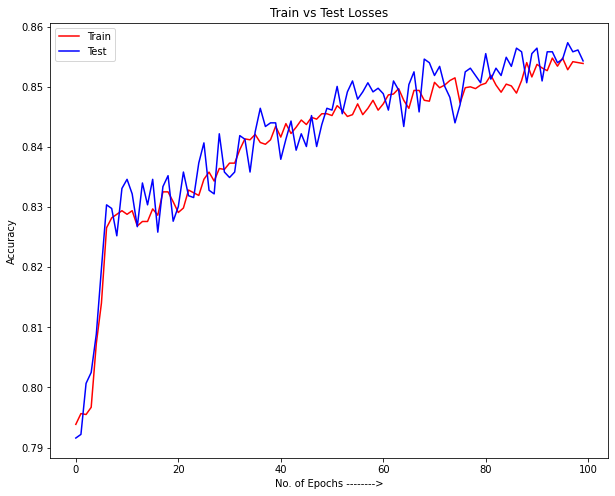

In [69]:
plt.figure(figsize=(10,8))
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'b')
plt.title('Train vs Test Losses')
plt.xlabel('No. of Epochs -------->')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='best')

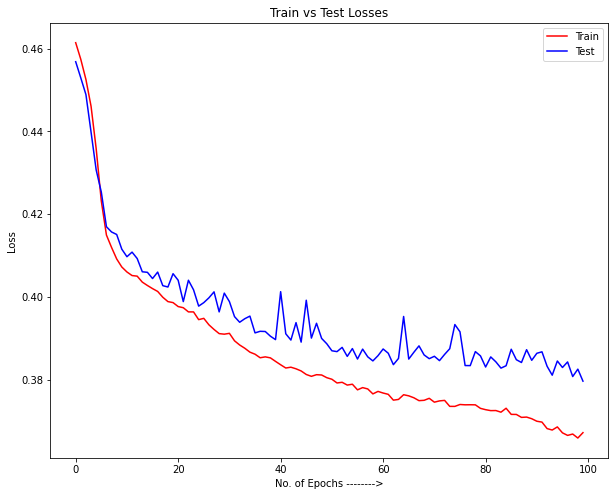

In [74]:
plt.figure(figsize=(10,8))
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')
plt.title('Train vs Test Losses')
plt.xlabel('No. of Epochs -------->')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='best')

In [77]:
def predict_churn(values) :
    
    x = np.array(values) # our input is in a form of list so converttransformnto an array
    x = x.reshape(1,-1) # because our values is a 1 list containing all the input parameters
    x = std_scaler.transform(x) # transforming the values
    
    return model.predict(x)
    

In [79]:
values = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
res = predict_churn(values)

if res > 0.5 :
    print('High chances of exiting!!')
else:
    print('Not exiting !!')

High chances of exiting!!


In [90]:
values = [-2.19898783,  1.43776051, -1.04175968, -1.22584767, -0.91158349,
        -1.54776799, -1.03067011,  1.59409891, -0.57873591,  1.74273971,
        -1.09598752]
res = predict_churn(values)

if res > 0.5 :
    print('High chances of exiting!!')
else:
    print('Not exiting !!')


High chances of exiting!!


In [89]:
X[566],y[566]



(array([-2.19898783,  1.43776051, -1.04175968, -1.22584767, -0.91158349,
        -1.54776799, -1.03067011,  1.59409891, -0.57873591,  1.74273971,
        -1.09598752]),
 1)